In [1]:
import numpy as np
import pandas as pd
#import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import math
import re
import pyodbc
import pandasql as ps
from pandasql import sqldf
from datetime import date
import sqlalchemy

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)

In [5]:
#FROM [COVID].[dbo].[CovidDeath]
server_PROD = 'DESKTOP-0QEG7F0' 
database = 'COVID'
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server_PROD+';DATABASE='+database+';Trusted_Connection=yes;')
cursor = cnxn.cursor()

query = """

select * 
from [COVID].[dbo].[CovidDeath]

"""
df_covid_data = pd.read_sql(query, cnxn)


# Close the connection
cursor.close()
cnxn.close()

df = df_covid_data
df



,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,5.0,5.0,NaN,None,None,None,0.126,0.126,NaN,None,None,None,None,None,None,None,None,None,None,None,None
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,NaN,None,None,None,0.126,0.000,NaN,None,None,None,None,None,None,None,None,None,None,None,None
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,5.0,0.0,NaN,None,None,None,0.126,0.000,NaN,None,None,None,None,None,None,None,None,None,None,None,None
3,AFG,Asia,Afghanistan,2020-02-27,39835428.0,5.0,0.0,NaN,None,None,None,0.126,0.000,NaN,None,None,None,None,None,None,None,None,None,None,None,None
4,AFG,Asia,Afghanistan,2020-02-28,39835428.0,5.0,0.0,NaN,None,None,None,0.126,0.000,NaN,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,CZE,Europe,Czechia,2022-01-31,10724553.0,3013454.0,24018.0,35664.857,None,None,None,280986.443,2239.534,3325.533,None,None,None,None,None,None,None,None,None,None,None,None
65531,CZE,Europe,Czechia,2022-02-01,10724553.0,3043084.0,29630.0,35548.429,None,None,None,283749.262,2762.819,3314.677,None,None,None,None,None,None,None,None,None,None,None,None
65532,CZE,Europe,Czechia,2022-02-02,10724553.0,3100462.0,57378.0,38071.571,None,None,None,289099.415,5350.153,3549.945,None,None,None,None,None,None,None,None,None,None,None,None
65533,CZE,Europe,Czechia,2022-02-03,10724553.0,3143912.0,43450.0,36440.714,None,None,None,293150.866,4051.451,3397.877,None,None,None,None,None,None,None,None,None,None,None,None


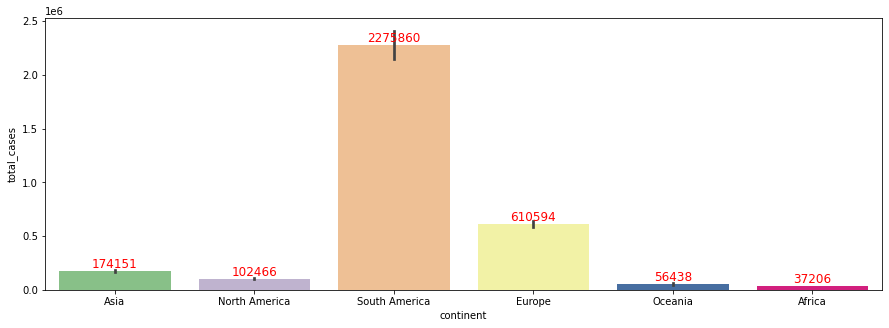

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(x='continent', y ='total_cases',  data= df, palette='Accent')


ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), fontsize =12, color = 'red', ha ='center',va = 'bottom' )
    
